# Project: ML - Multivariate Liner Regression, Decision Tree Regressor and Random Forest Regressor (Predict Bike Rentals)

<br>

## Questions to address:
- From the data on bike rentals, try to predict how many people rented bikes in a given hour

<br>

## Tools:
- Models:
  - sklearn Multivariate LR (using Ordinary Least Squares)
  - Decision Tree Regressor
  - Random Forest Regressor
- Error Metric: MSE and MAE
- Holdout Validation 

<br>

### load defaults

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import requests 

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
import matplotlib.dates as mdates
from datetime import datetime
from IPython.display import display, Math

from functions import *

plt.style.use('seaborn')
plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green', '#9E80BA', '#8EDB8E', '#58517A']
Ncolors = 10
color_map = plt.cm.Blues_r(np.linspace(0.2, 0.5, Ncolors))
#color_map = plt.cm.tab20c_r(np.linspace(0.2, 0.5, Ncolors))


#specific to this project
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Defaults Loaded")

Defaults Loaded


<br>

## Dataset: Bike Rentals, predict number of people renting a bike in a given hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


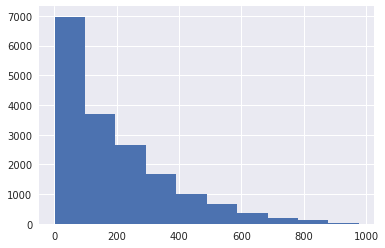

In [2]:
bike_rentals = pd.read_csv('./data/bike_rental_hour.csv')
display(bike_rentals[:3])

bike_rentals['cnt'].hist()
plt.show()

check most correlated variables

In [3]:
correlations = bike_rentals.corr()
print(np.abs(correlations['cnt']).sort_values(ascending=False))

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64


create new label for the hours in which bikes were rented

In [4]:
def assign_label(hour):    
    if((hour>=6) & (hour<12)):
        return 1
    elif((hour>=12) & (hour<18)):
        return 2
    elif((hour>=18) & (hour<24)):
        return 3
    elif((hour>=0) & (hour<6)):
        return 4
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(lambda x: assign_label(x))
#print(bike_rentals[0:19])

split into train and test for Holdout validation

In [5]:
train = bike_rentals[0:int(len(bike_rentals)*0.8)]
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

<br>

### Linear Regression model (with OLS)

MSE: 29129.66
MAE: 126.75


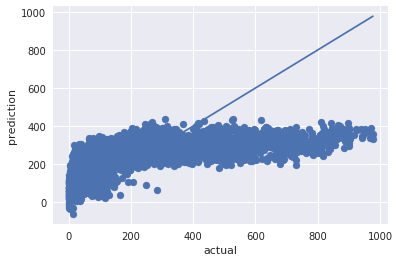

In [6]:
columns = bike_rentals.columns.drop(['instant', 'cnt', 'casual', 'dteday', 'registered'])

model = LinearRegression()
model.fit(train[columns], train['cnt'])
predictions = model.predict(test[columns])
MSE_error = mean_squared_error(test['cnt'],predictions)
print("MSE: {:0.2f}".format(MSE_error))
MAE_error = mean_absolute_error(test['cnt'],predictions)
print("MAE: {:0.2f}".format(MAE_error))

plt.scatter(test['cnt'],predictions)

x = np.linspace(0, max(test['cnt']))
plt.plot(x,x)
plt.xlabel('actual')
plt.ylabel('prediction')

plt.show()

<br>

### Decision Tree model

MSE: 29129.66
MAE: 53.21


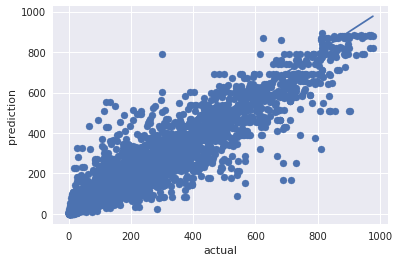

In [7]:
columns = bike_rentals.columns.drop(['instant', 'cnt', 'casual', 'dteday', 'registered'])

model = DecisionTreeRegressor(random_state=1, min_samples_leaf=2)
#model = DecisionTreeRegressor(random_state=1, max_depth=15, min_samples_split=13)
model.fit(train[columns], train['cnt'])
predictions = model.predict(test[columns])
error = mean_squared_error(test['cnt'],predictions)
print("MSE: {:0.2f}".format(MSE_error))
MAE_error = mean_absolute_error(test['cnt'],predictions)
print("MAE: {:0.2f}".format(MAE_error))

plt.scatter(test['cnt'],predictions)

x = np.linspace(0, max(test['cnt']))
plt.plot(x,x)
plt.xlabel('actual')
plt.ylabel('prediction')

plt.show()

<br>

### Random Forest model

MSE: 4871.48
MAE: 44.82


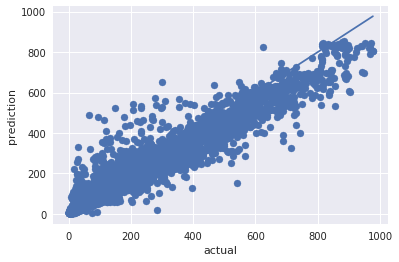

In [8]:
model = RandomForestRegressor(n_estimators=150, random_state=1, min_samples_leaf=2)

model.fit(train[columns], train['cnt'])
predictions = model.predict(test[columns])
MSE_error = mean_squared_error(test['cnt'],predictions)
print("MSE: {:0.2f}".format(MSE_error))
MAE_error = mean_absolute_error(test['cnt'],predictions)
print("MAE: {:0.2f}".format(MAE_error))


plt.scatter(test['cnt'],predictions)

x = np.linspace(0, max(test['cnt']))
plt.plot(x,x)
plt.xlabel('actual')
plt.ylabel('prediction')

plt.show()

there seems to be larger bias at high counts than for the DecisionTreeRegressor but it is a better model because there are many more values at low counts